# Compute Metrics of Given Dataset

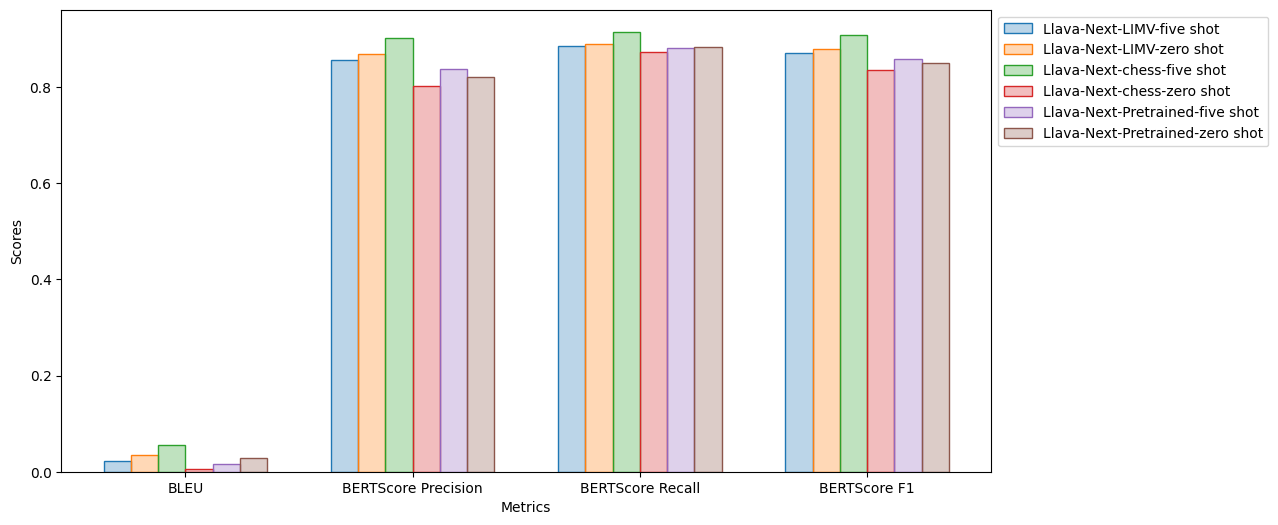

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Define models and metrics
models = ["Llava-Next-LIMV-five shot", "Llava-Next-LIMV-zero shot", 
          "Llava-Next-chess-five shot", "Llava-Next-chess-zero shot", 
          "Llava-Next-Pretrained-five shot", "Llava-Next-Pretrained-zero shot"]
metrics = ["BLEU", "BERTScore Precision", "BERTScore Recall", "BERTScore F1"]

# Corresponding scores from the table
scores = [
    [0.0224, 0.8560, 0.8843, 0.8698],    # Llava-Next-LIMV-five shot
    [0.0338, 0.8686, 0.8885, 0.8784],    # Llava-Next-LIMV-zero shot
    [0.0561, 0.9016, 0.9150, 0.9082],    # Llava-Next-chess-five shot
    [0.0051, 0.8023, 0.8733, 0.8362],    # Llava-Next-chess-zero shot
    [0.0170, 0.8365, 0.8806, 0.8579],    # Llava-Next-Pretrained-five shot
    [0.0287, 0.8207, 0.8823, 0.8504]     # Llava-Next-Pretrained-zero shot
]

# Color settings
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(default_colors)

# Bar chart parameters
num_metrics = len(metrics)
num_models = len(models)
bar_width = 0.12
index = np.arange(num_metrics)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
for i, model_scores in enumerate(scores):
    color = next(color_cycle)
    ax.bar(index + i * bar_width, model_scores, bar_width,
           label=models[i],
           facecolor=color + '4D',
           edgecolor=color, 
           linewidth=1)

# Labeling
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_xticks(index + bar_width * (num_models - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Benchmark
## MME

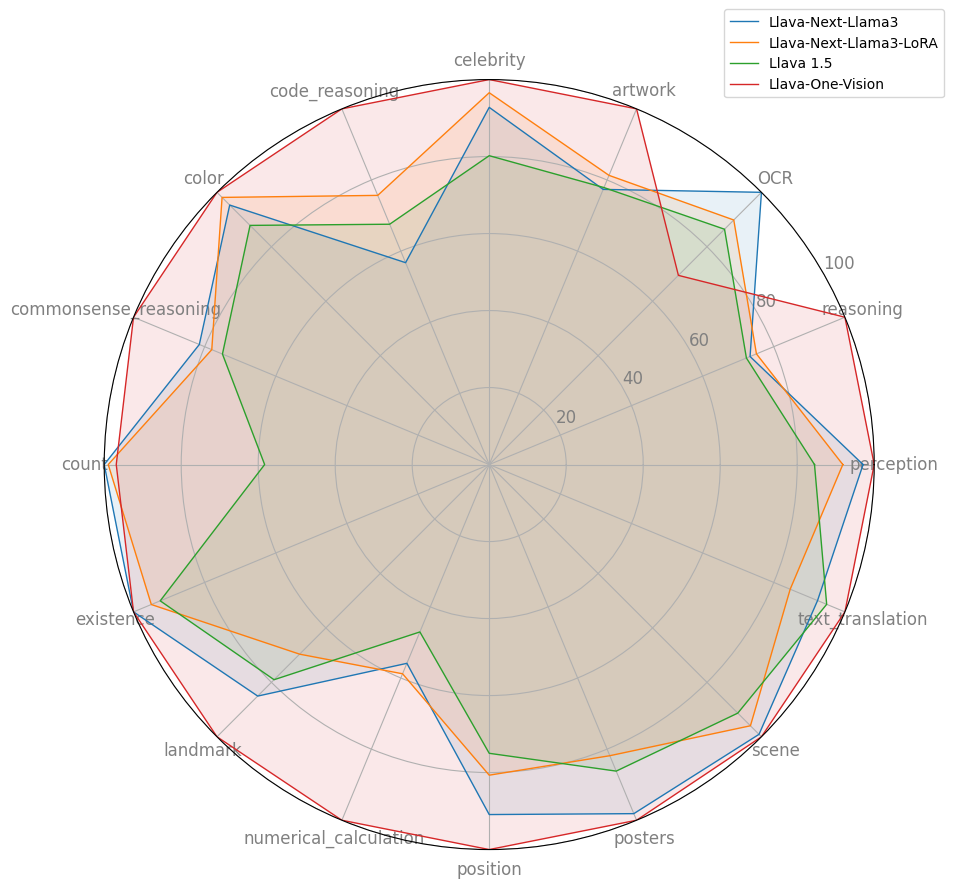

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

categories = ["perception","reasoning","OCR","artwork","celebrity","code_reasoning","color","commonsense_reasoning","count","existence","landmark","numerical_calculation","position","posters","scene","text_translation"]

llava_next_llama3 = [1539.267507002801,306.42857142857144,147.5,112.75,143.52941176470588,52.5,170.0,116.42857142857142,160.0,200.0,145.0,47.5,133.33333333333334,161.90476190476193,165.25,90.0]
llava_next_llama3_lora = [1455.8624449779911,313.92857142857144,132.5,118.5,149.41176470588238,70.0,175.0,111.42857142857142,158.33333333333331,190.0,118.75,50.0,118.33333333333334,135.03401360544217,160.0,82.5]
llava_1_5 = [1339.2945178071227,302.1428571428571,127.5,113.5,124.11764705882354,62.5,156.66666666666669,107.14285714285714,93.33333333333333,185.0,134.75,40.0,110.0,142.1768707482993,152.25,92.5]
llava_ov = [1585.171868747499,417.8571428571429,102.5,145.75,154.7058823529412,92.5,178.33333333333331,142.85714285714286,155.0,200.0,170.5,85.0,146.66666666666666,164.96598639455783,166.75,97.5]


all_data = np.array([llava_next_llama3, llava_next_llama3_lora, llava_1_5, llava_ov])
max_values = np.max(all_data, axis=0)
normalized_data = (all_data / max_values) * 100

data_for_plotting = [np.append(values, values[0]) for values in normalized_data]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]
for i, data in enumerate(data_for_plotting):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=12)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## MMBench

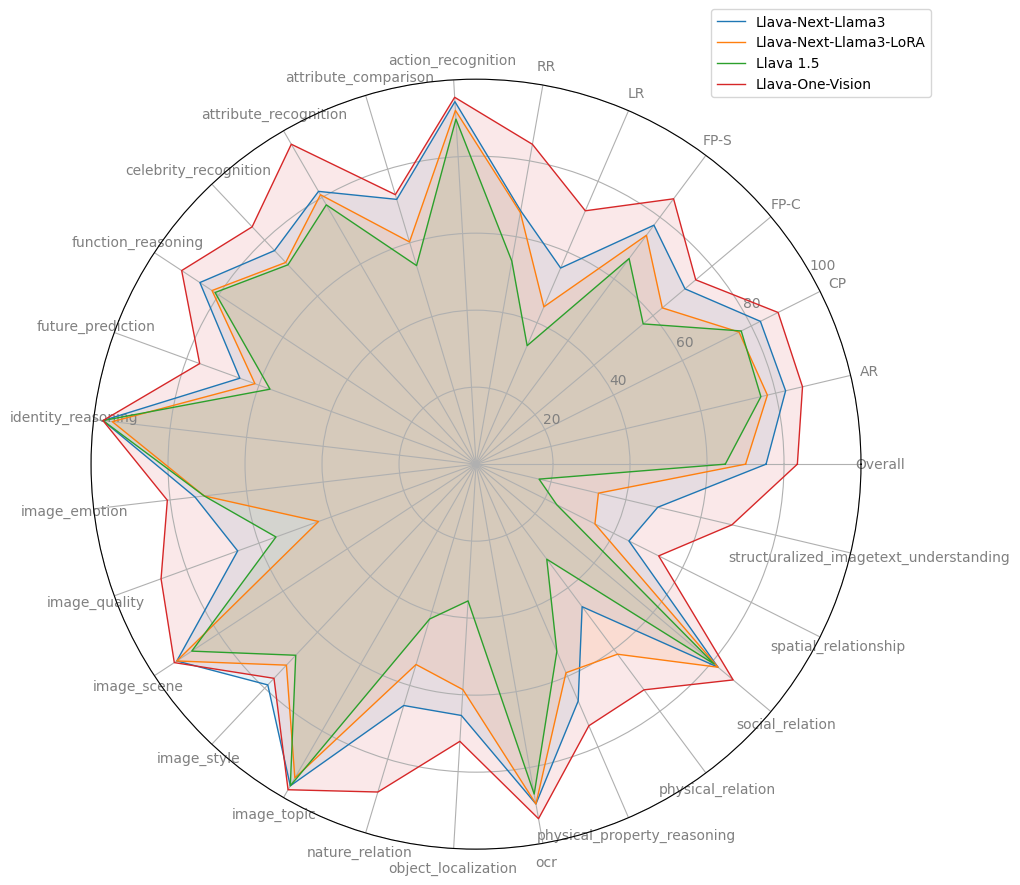

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import re

file_paths = ["llava_next_llama3/llava_next_llama3_MMBench_TEST_EN_score.txt", "llava_next_llama3_lora/llava_next_llama3_lora_MMBench_TEST_EN_score.txt", "llava_v1.5_7b/llava_v1.5_7b_MMBench_TEST_EN_score.txt", "llava_onevision_qwen2_7b_ov/llava_onevision_qwen2_7b_ov_MMBench_TEST_EN_score.txt"]
labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]

all_data = []
categories = None

for file_path in file_paths:
    data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = re.match(r"(.*? \(test\))\s+np\.float64\(([\d\.]+)\)", line)
            if match:
                category, value = match.groups()
                category = re.sub(r"^[ABC]_| \(test\)", "", category.strip())
                data[category.strip()] = float(value)
    if categories is None:
        categories = list(data.keys())
    values = list(data.values())
    normalized_values = [value * 100 for value in values]
    all_data.append(np.append(normalized_values, normalized_values[0]))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, data in enumerate(all_data):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## MMBecnh V1.1

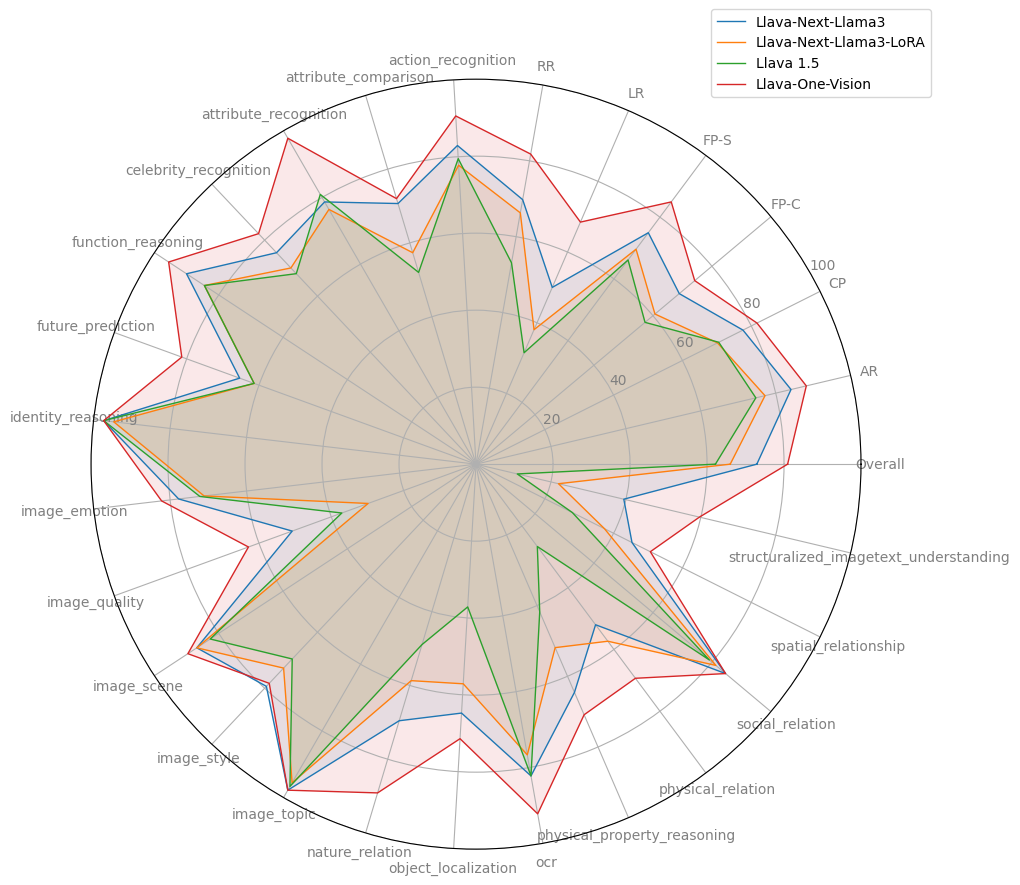

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import re

file_paths = ["llava_next_llama3/llava_next_llama3_MMBench_TEST_EN_V11_score.txt", 
              "llava_next_llama3_lora/llava_next_llama3_lora_MMBench_TEST_EN_V11_score.txt", 
              "llava_v1.5_7b/llava_v1.5_7b_MMBench_TEST_EN_V11_score.txt", 
              "llava_onevision_qwen2_7b_ov/llava_onevision_qwen2_7b_ov_MMBench_TEST_EN_V11_score.txt"]
labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]

all_data = []
categories = None

for file_path in file_paths:
    data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = re.match(r"(.*? \(test\))\s+np\.float64\(([\d\.]+)\)", line)
            if match:
                category, value = match.groups()
                category = re.sub(r"^[ABC]_| \(test\)", "", category.strip())
                data[category.strip()] = float(value)
    if categories is None:
        categories = list(data.keys())
    values = list(data.values())
    normalized_values = [value * 100 for value in values]
    all_data.append(np.append(normalized_values, normalized_values[0]))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, data in enumerate(all_data):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## MMMU

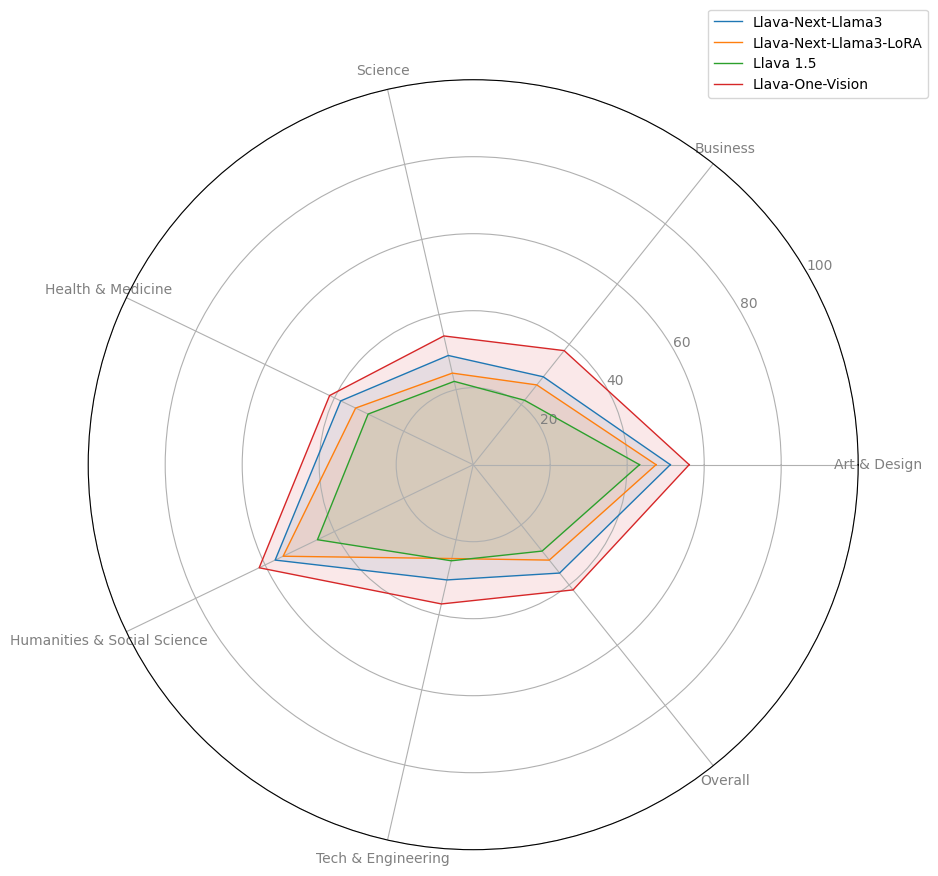

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import json

file_paths = [
    "llava_next_llama3/llava_next_llama3_MMMU_TEST_leaderboard.json",
    "llava_next_llama3_lora/llava_next_llama3_lora_MMMU_TEST_leaderboard.json",
    "llava_v1.5_7b/llava_v1.5_7b_MMMU_TEST_leaderboard.json",
    "llava_onevision_qwen2_7b_ov/llava_onevision_qwen2_7b_ov_MMMU_TEST_leaderboard.json"
]
labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]

all_data = []
categories = None

for file_path in file_paths:
    with open(file_path, "r") as file:
        data_json = json.load(file)
        data = data_json[0]["test_split"]
        
        if categories is None:
            categories = list(data.keys())
        
        values = [value * 100 for value in data.values()]
        all_data.append(np.append(values, values[0]))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, data in enumerate(all_data):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## POPE

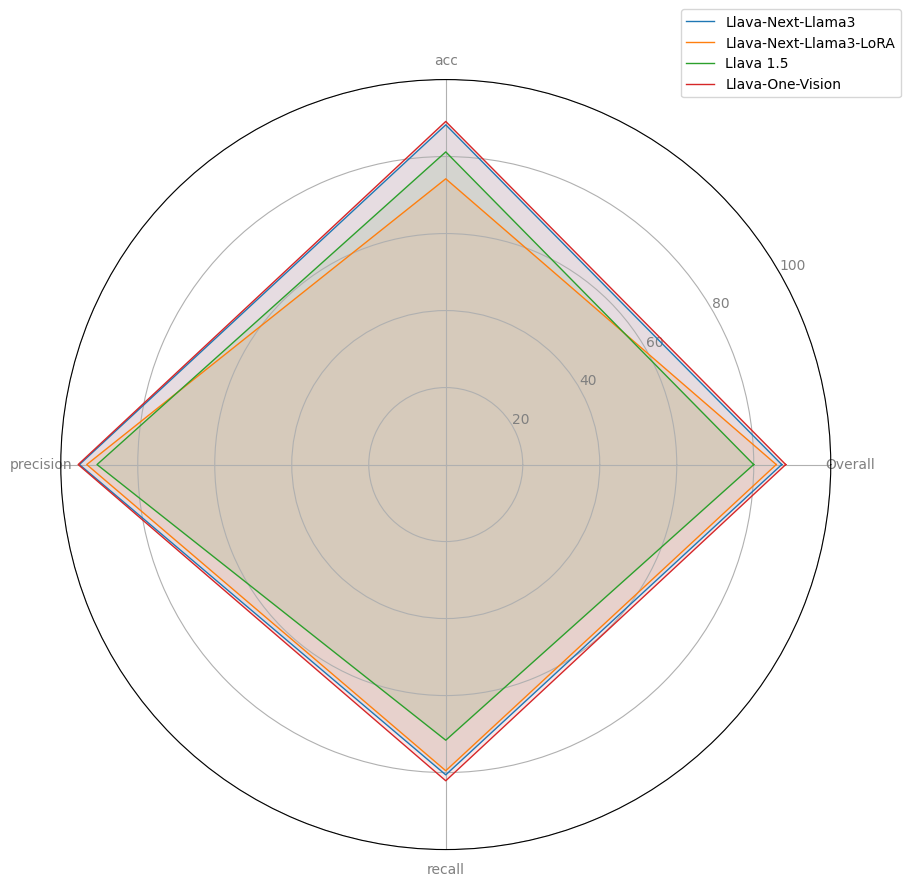

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

file_paths = [
    "llava_next_llama3/llava_next_llama3_POPE_score.csv",
    "llava_next_llama3_lora/llava_next_llama3_lora_POPE_score.csv",
    "llava_v1.5_7b/llava_v1.5_7b_POPE_score.csv",
    "llava_onevision_qwen2_7b_ov/llava_onevision_qwen2_7b_ov_POPE_score.csv"
]
labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]

all_data = []
categories = None

for file_path in file_paths:
    data = pd.read_csv(file_path)
    if categories is None:
        categories = list(data.columns[1:])
    
    overall_data = data[data['split'] == 'Overall'].iloc[0, 1:].values
    all_data.append(np.append(overall_data, overall_data[0]))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, data in enumerate(all_data):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## AI2D

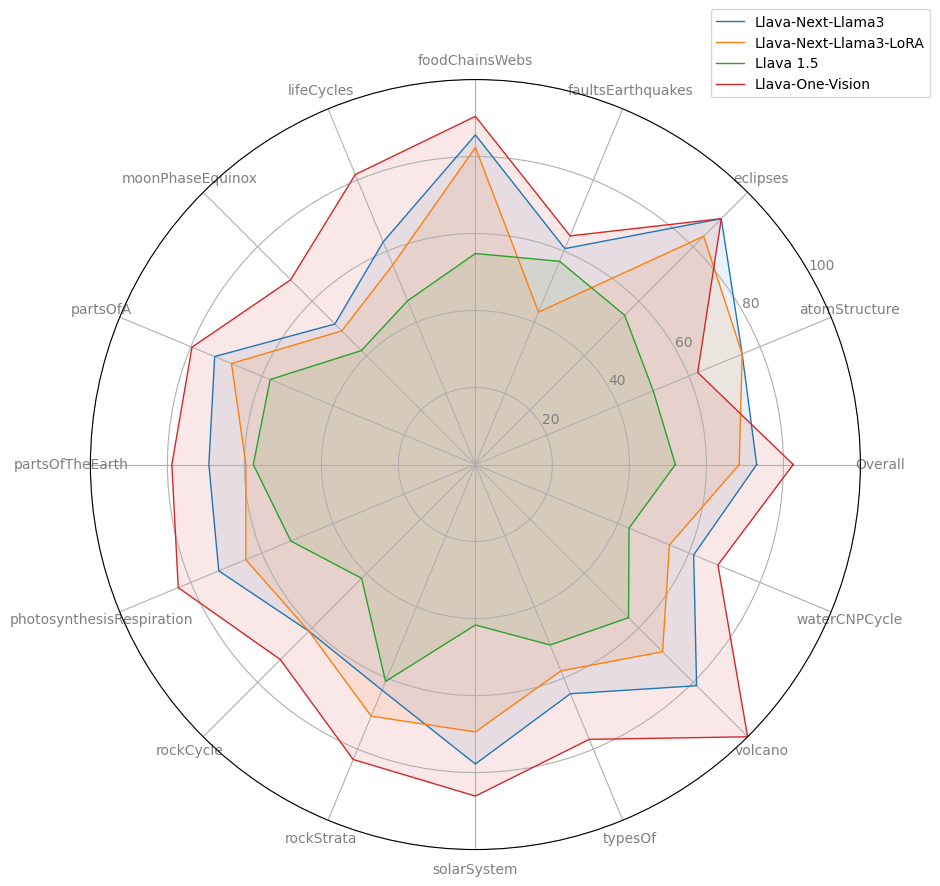

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

file_paths = [
    "llava_next_llama3/llava_next_llama3_AI2D_TEST_acc.csv",
    "llava_next_llama3_lora/llava_next_llama3_lora_AI2D_TEST_acc.csv",
    "llava_v1.5_7b/llava_v1.5_7b_AI2D_TEST_acc.csv",
    "llava_onevision_qwen2_7b_ov/llava_onevision_qwen2_7b_ov_AI2D_TEST_acc.csv"
]
labels = ["Llava-Next-Llama3", "Llava-Next-Llama3-LoRA", "Llava 1.5", "Llava-One-Vision"]

all_data = []
categories = None

for file_path in file_paths:
    data = pd.read_csv(file_path)
    if categories is None:
        categories = list(data.columns[1:])
    
    none_data = data[data['split'] == 'none'].iloc[0, 1:].values * 100
    all_data.append(np.append(none_data, none_data[0]))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, data in enumerate(all_data):
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=labels[i])
    ax.fill(angles, data, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()